In [51]:
import math
import numpy as np
import timeit
from functools import reduce
import matplotlib.pyplot as plt

### This one's a less exciting venture, but one that's important, regardless. You know how one defaults to writing a bunch of loops to get the job done by iterating over some list? Well, that's time consuming. Let's explore alternatives and also see what other cool tricks exist.

### 8.1 Map

#### We want to normalize a list so the values lie between 0 and 1.

In [26]:
x = [2, math.pi, 3.8, np.log(500), 25]

#the usual looping
start = timeit.default_timer()
new_x = []
for i in x:
    new_x.append((i - min(x))/(max(x)-min(x)))
time = timeit.default_timer() - start
print('regular loop: \n t = {}'.format(time), '\n')

#or better, list comprehension
start = timeit.default_timer()
new_x = [(i-min(x))/(max(x)-min(x)) for i in x]
time = timeit.default_timer() - start
print('list comprehension: \n t = {}'.format(time), '\n')

#let's use map, now
def norm_list(a, min_value, max_value):
    norm_a = (a-min_value) / (max_value-min_value)
    return norm_a
start = timeit.default_timer()
new_x = list(map(lambda a: norm_list(a, min(x), max(x)), x))
time = timeit.default_timer() - start
print('map: \n t = {}'.format(time), '\n')

regular loop: 
 t = 0.0001602000002094428 

list comprehension: 
 t = 0.00013060000014775142 

map: 
 t = 0.0001090999999178166 



#### Run it as many times as you want, list comprehension is always going to be faster than regular loop. For map, unless one is using a built-in python function, the custom function will need to be written, first. Then the map operation can be done.
#### Faster than LC
It goes like map(lambda x: function(x, arg1,...), thing we want to loop over)

### 8.2 Map/Reduce

#### Cooler example. I have a list of numbers, I want to compute the average of the square of the elements. This is a two-step operation: square, then add up. Map can be used for the first part, reduce for the second. Here's how

In [48]:
Lnum = [1, 1, 2, 3, 5, 8, 13, 21]

def numpy_method(L):
    '''Finds average of the square of elements in a list'''
    start = timeit.default_timer()
    return 'method1', np.average(np.array(L)), timeit.default_timer() - start
    
def experto_method(L):
    '''same as above, but even better.'''
    start = timeit.default_timer()
    sq = list(map(lambda x: x**2, Lnum))
    ave = 1/len(sq) * reduce(lambda x, y: x + y, sq)
    return 'method2', np.average(L), timeit.default_timer() - start
    
print(numpy_method(Lnum))
print(experto_method(Lnum))

('method1', 6.75, 0.0001299000000472006)
('method2', 6.75, 6.650000023000757e-05)


#### Brilliant! Of course, the difference in time is marginal. But imagine i) if it does better than a numpy one-liner, how much better it would be than a loop, 2) how much more awesome it will be when applied to large datasets!

#### I am curious. Let's try it again with the problem slightly modified. I want to plot the average of fibonacci numbers as a function of N. First, we have to write a helper function that generates the list of fibonacci numbers. You can do it the easy route, or the scary way. Let's try the scary way

### 8.3 Map/Reduce and even Recursion :o

#### In recursion, somewhat analogous to mathematical induction, you begin with the base case. What if my list is empty, for instance? Then once that condition is fulfilled, every other condition should resemble each other and be covered in 1-2 or so if and elif cases. The most general case makes a callback to the function itself. Now that I think about it, there is some semblance of self-similarity or fractality involved here...

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584]
usual: 0.01942719999988185
with map/reduce: 0.014011799999934738


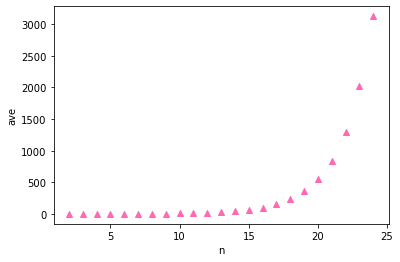

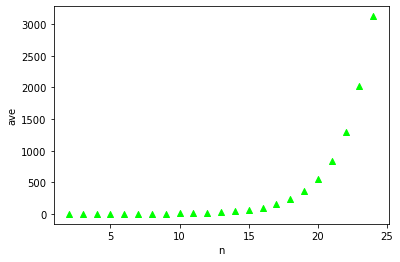

In [100]:
def generate_fibonacci(n):
    if n <= 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0,1]
    else:
        out = generate_fibonacci(n-1)
        out.append(out[-1] + out[-2]) #sum up the last two elements
        return out
print(generate_fibonacci(19))

def get_ave(L):
    return sum(L)/len(L)

#Now, we want to use our map/reduce skills for the purpose of plotting up averages
#first, the regular way
start = timeit.default_timer()
fig, ax = plt.subplots()
X, Y = [], []
for i in range(2, 25):
    X.append(i)
    Y.append(np.average(np.array(generate_fibonacci(i))))
ax.scatter(X, Y, marker = '^', c='hotpink')
ax.set_xlabel('n')
ax.set_ylabel('ave')
print('usual:', timeit.default_timer()-start)
    
#now, all of this but with map/reduce
start = timeit.default_timer()
fig, ax = plt.subplots()
X = list(range(2, 25))
Y = list(map(lambda i: get_ave(generate_fibonacci(i)), X))
ax.scatter(X, Y, marker = '^', c='lime')
ax.set_xlabel('n')
ax.set_ylabel('ave')
print('with map/reduce:', timeit.default_timer()-start)

#### This is a cool example because often we are solving similar problems, where the iterator is the dependent variable and then the y axis is some sum or average. 

### 8.4 Set

In [102]:
list1 = ['a', 'b', 'c', 'd']
list2 = ['alpha', 'b', 'gamma']
set(list1) - set(list2)

{'a', 'c', 'd'}

#### Dare I say more? That's it. Set finds the difference, the elements of the inverse of the intersection

In [103]:
set(list2) - set(list1)

{'alpha', 'gamma'}

#### Works the other way too.

### 8.5 Zip
#### This one is useful for assigning a key, value sort of pair, just like in a dictionary. 

In [116]:
list1 = [0, 1, 2, 3, 4, 5]
list2 = ['Jeffrey', 'Ted', 'Lizzy', 'Charles', 'Jack', 'Wayne']
combined = list(zip(list1, list2))
print(combined)

[(0, 'Jeffrey'), (1, 'Ted'), (2, 'Lizzy'), (3, 'Charles'), (4, 'Jack'), (5, 'Wayne')]


#### There you go! Pretty neat. My first thought would have been, hey, let me just make a dictionary. But here, look, way simpler.
And you can slice and index this list as you wish

### This one will blow your mind. 
### 8.6 Function Chaining

### We will use some of what we've learned so far and bundle them in a cool, pythonic way. It improves readibility, as well, one could argue

In [139]:
#back to our serial killer list
names = ['Jeffrey', 'Ted', 'Lizzy', 'Charles', 'Jack']
ages = [34, 42, 66, 83, float('nan'), 52]
result = reduce(
    lambda acc, func: func(acc),
    [
        zip(names, ages),  #first, combine
        lambda data: filter(lambda x: x[1] < 69, data),  #filter based on age
        lambda filtered_data: map(lambda x: f"{x[0]} was {x[1]} years old when he/she died", filtered_data), #formatted string
        tuple #convert list to a tuple
    ]
)
print(result)

('Jeffrey was 34 years old when he/she died', 'Ted was 42 years old when he/she died', 'Lizzy was 66 years old when he/she died')
